In [1]:
import pandas as pd
import torch

# Load the CSV file using pandas
df = pd.read_csv('train.csv')

# Extract the label column and convert to a PyTorch tensor
labels = torch.tensor(df['label'].values)

# Extract the pixel columns and convert to a PyTorch tensor
pixels = torch.tensor(df.drop('label', axis=1).values, dtype=torch.float32)

# Normalize the pixel values to be between 0 and 255
pixels /= 255.0

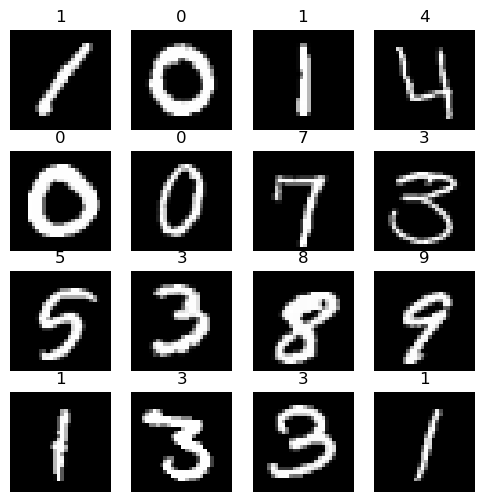

In [2]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
nrows, ncols = 4, 4
figsize = [6, 6]

# Create a new figure and set the size
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# Loop over the rows and columns of the grid
for i in range(nrows):
    for j in range(ncols):
        # Calculate the index of the current image in the pixel tensor
        idx = i * ncols + j
        
        # Get the pixel values and label for the current image
        img = pixels[idx].reshape(28, 28)
        label = labels[idx].item()
        
        # Plot the image and label on the current subplot
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(str(label))
        
        # Hide the axis labels and ticks
        ax[i, j].axis('off')

# Show the plot
plt.show()

In [3]:
# Define the proportion of the data to use for testing
test_size = 0.2

# Calculate the number of samples to use for testing
test_samples = int(len(labels) * test_size)

# Shuffle the indices of the samples
indices = torch.randperm(len(labels))

# Split the indices into training and testing sets
train_indices = indices[test_samples:]
test_indices = indices[:test_samples]

# Use the indices to extract the pixel data and labels for the training and testing sets
train_pixels = pixels[train_indices]
train_labels = labels[train_indices]
test_pixels = pixels[test_indices]
test_labels = labels[test_indices]

# Print the sizes of the training and testing sets
print(f"Training set size: {len(train_pixels)}")
print(f"Testing set size: {len(test_pixels)}")

Training set size: 33600
Testing set size: 8400


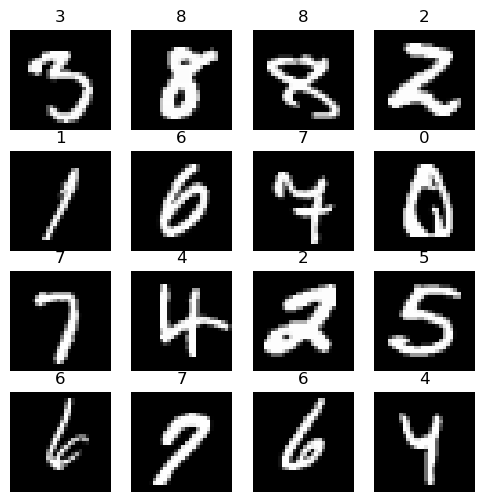

In [4]:
import matplotlib.pyplot as plt

# Define the number of rows and columns in the grid
nrows, ncols = 4, 4
figsize = [6, 6]

# Create a new figure and set the size
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)

# Loop over the rows and columns of the grid
for i in range(nrows):
    for j in range(ncols):
        # Calculate the index of the current image in the pixel tensor
        idx = i * ncols + j
        
        # Get the pixel values and label for the current image
        img = train_pixels[idx].reshape(28, 28)
        label = train_labels[idx].item()
        
        # Plot the image and label on the current subplot
        ax[i, j].imshow(img, cmap='gray')
        ax[i, j].set_title(str(label))
        
        # Hide the axis labels and ticks
        ax[i, j].axis('off')

# Show the plot
plt.show()

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [6]:
import os
#import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [63]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the neural network architecture
class DigitRecognizer(nn.Module):
    def __init__(self):
        super(DigitRecognizer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 28*36)
        self.fc2 = nn.Linear(28*36, 512)
        #self.fc3 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(512, 10)
        self.relu = nn.LeakyReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.fc3(x))
        x = self.softmax(self.fc3(x))
        return x

# Instantiate the neural network
model = DigitRecognizer()
print(model)

DigitRecognizer(
  (fc1): Linear(in_features=784, out_features=1008, bias=True)
  (fc2): Linear(in_features=1008, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (softmax): Softmax(dim=1)
)


In [64]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Define the training and testing datasets
train_dataset = TensorDataset(train_pixels.float(), train_labels)
test_dataset = TensorDataset(test_pixels.float(), test_labels)

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
save_every = 2
train_iterations = 20
epoch = 0

In [68]:

# Train the neural network
for epoch in range(train_iterations):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} loss: {running_loss/len(train_loader)}")
    #break
    if (epoch % save_every == 0):
        model_file_name = f'model_weights_{epoch}.pth'
        print(f'Saving model as {model_file_name}')
        torch.save(model, model_file_name)
torch.save(model, f'model_weights_{train_iterations}.pth')

Epoch 1 loss: 1.4827783448355538
Saving model as model_weights_0.pth
Epoch 2 loss: 1.4815605363391695
Epoch 3 loss: 1.4805982262747628
Saving model as model_weights_2.pth
Epoch 4 loss: 1.4813901201883952
Epoch 5 loss: 1.4829757490612212
Saving model as model_weights_4.pth
Epoch 6 loss: 1.482174495288304
Epoch 7 loss: 1.4784395908174062
Saving model as model_weights_6.pth
Epoch 8 loss: 1.4794157648086548
Epoch 9 loss: 1.4815483127321516
Saving model as model_weights_8.pth
Epoch 10 loss: 1.4822684794380552
Epoch 11 loss: 1.4809580800646827
Saving model as model_weights_10.pth
Epoch 12 loss: 1.4826353036789668
Epoch 13 loss: 1.4818007485071818
Saving model as model_weights_12.pth
Epoch 14 loss: 1.4818477869033813
Epoch 15 loss: 1.4825560930797033
Saving model as model_weights_14.pth
Epoch 16 loss: 1.4831893532616751
Epoch 17 loss: 1.4826956013270787
Saving model as model_weights_16.pth
Epoch 18 loss: 1.4851101993379139
Epoch 19 loss: 1.4820337654295421
Saving model as model_weights_18.pth

In [77]:
# Evaluate the neural network on the testing set
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total}%")

Accuracy on test set: 97.39285714285714%


In [56]:
from torch.utils.data import DataLoader, TensorDataset

def evaluate(model_file, test_pixels, test_labels):
    # Load the neural network from file
    model = torch.load(model_file)
    
    # Get the name of the model
    model_name = model_file.split("/")[-1]
    
    # Define the testing dataset
    test_dataset = TensorDataset(test_pixels.float(), test_labels)
    
    # Define the data loader
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
    
    # Evaluate the neural network on the testing set
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    accuracy = round(accuracy, 4)
    print(f"Accuracy of {model_name} on test set: {accuracy}%")
    
    return accuracy

In [70]:
for i in range(train_iterations):
    if (i % save_every == 0):
        print(i)
        evaluate(f'model_weights_{i}.pth',test_pixels, test_labels)

0
Accuracy of model_weights_0.pth on test set: 96.5119%
2
Accuracy of model_weights_2.pth on test set: 96.9405%
4
Accuracy of model_weights_4.pth on test set: 96.7381%
6
Accuracy of model_weights_6.pth on test set: 97.3929%
8
Accuracy of model_weights_8.pth on test set: 96.9405%
10
Accuracy of model_weights_10.pth on test set: 96.4524%
12
Accuracy of model_weights_12.pth on test set: 96.5476%
14
Accuracy of model_weights_14.pth on test set: 96.2976%
16
Accuracy of model_weights_16.pth on test set: 95.4762%
18
Accuracy of model_weights_18.pth on test set: 95.619%


In [29]:
evaluate(f'model_weights_{train_iterations}.pth',test_pixels, test_labels)

Accuracy of model_weights_500.pth on test set: 91.0%


91.0

In [76]:
model = torch.load('model_weights_6.pth') #fill manually choosing best model

Filling submission file

In [78]:
# Load the CSV file using pandas
df_test = pd.read_csv('test.csv')

# Extract the label column and convert to a PyTorch tensor
#labels = torch.tensor(df['label'].values)

# Extract the pixel columns and convert to a PyTorch tensor
pixels_test_file = torch.tensor(df_test.values, dtype=torch.float32)

# Normalize the pixel values to be between 0 and 255
pixels_test_file /= 255.0

In [79]:
all_predictions = []
with torch.no_grad():
    for i in pixels_test_file:
        outputs = model(i)
        _,predicted = torch.max(outputs.data, 1)
        all_predictions.extend(predicted.numpy())
# Save the predictions to a new CSV file
image_ids = [i+1 for i in range(len(all_predictions))]
df = pd.DataFrame({'ImageId': image_ids, 'Label': all_predictions})
df.to_csv('My_model_predictions.csv', index=False)